# HomeWork 3
Adam Kulas  
watiam: akulas  
student number: 20302000  

References:
https://archive.ics.uci.edu/ml/machine-learning-databases/communities/

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from IPython.display import display, HTML
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('data/communities.data', header=None, na_values='?')
with open('data/communities.names') as f:
    columns = [line.split(' ')[1] for line in f.readlines() if line.startswith('@attribute ')]
data.columns = columns
print(data.shape)
display(data.head(15))

(1994, 128)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0

## Clean Data

Some if the data is missing in the dataset. This missing data is filled with the mean value of the feature.

In [3]:
data_filled = data
data_filled.iloc[:,4:] = data.iloc[:,4:].apply(lambda x: x.fillna(x.mean()),axis=0)
data_filled.columns = columns
display(data_filled.head(30))

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.030000,0.130000,0.960000,0.170000,0.060000,0.180000,0.440000,0.130000,0.940000,0.930000,0.03000,0.070000,0.100000,0.070000,0.020000,0.57000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0

## Perform PCA

The data used for the PCA starts from column 4 onwards.  
This decision was made because the county state or community cannot use mean to fill NaN values. Alternatively the mode could be used to replace the NaN values or the sample could have been dropped

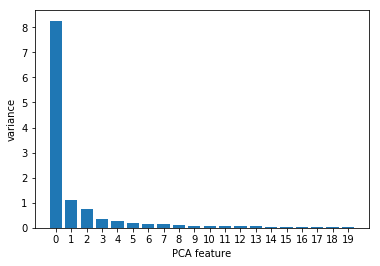

0     8.261395
1     1.089839
2     0.760844
3     0.333962
4     0.287441
5     0.186957
6     0.161923
7     0.133371
8     0.111869
9     0.088794
10    0.076732
11    0.057319
12    0.055713
13    0.053844
14    0.048041
15    0.045104
16    0.039366
17    0.033291
18    0.029954
19    0.028349
dtype: float64

In [4]:
# Create a PCA instance: pca
pca = PCA()

# Fit the data
pca.fit(data_filled.iloc[:,4:])

# Plot the explained variances
n = 20
features = range(pca.n_components_)
plt.bar(features[:n], pca.explained_variance_[:n])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features[:n])
plt.show()
eigen_values = pd.Series(pca.explained_variance_)[:n]
display(eigen_values)

In [5]:
# Determine how many features must be kept to retain 95% of the variance
total_variance = np.sum(eigen_values)
num_pca_features = []
for num_components in range(20):
    ratio = np.sum(eigen_values[:num_components]) / total_variance
    num_pca_features.append(ratio)
    print('number of PCs: ', num_components, ' Variance Ratio: ', ratio)

number of PCs:  0  Variance Ratio:  0.0
number of PCs:  1  Variance Ratio:  0.6951633856327811
number of PCs:  2  Variance Ratio:  0.7868689827183053
number of PCs:  3  Variance Ratio:  0.8508909735025484
number of PCs:  4  Variance Ratio:  0.8789925212379436
number of PCs:  5  Variance Ratio:  0.9031794951857989
number of PCs:  6  Variance Ratio:  0.9189111428813157
number of PCs:  7  Variance Ratio:  0.932536311317395
number of PCs:  8  Variance Ratio:  0.9437589290582613
number of PCs:  9  Variance Ratio:  0.9531722386249255
number of PCs:  10  Variance Ratio:  0.9606438938352004
number of PCs:  11  Variance Ratio:  0.9671005844367883
number of PCs:  12  Variance Ratio:  0.9719237310352683
number of PCs:  13  Variance Ratio:  0.9766117595932257
number of PCs:  14  Variance Ratio:  0.9811425240972542
number of PCs:  15  Variance Ratio:  0.9851849662681417
number of PCs:  16  Variance Ratio:  0.9889802763341629
number of PCs:  17  Variance Ratio:  0.9922927319284601
number of PCs:  18

We can see the top 20 pca features in the above table and scree plot figure.  
To me there is not a clear point where the dimensions could be cut off, however there are a couple techniques we could use to make the decision.
- Looking at the scree plot, the variance begins to drop more drastically starting at PCA feature 3. Therefore we could arbitrarily choose PCA 0, 1, and 2 to represent the data
- The second way would be to sum the value of the eigen_values, and choose enough features to retain some ratio of the total variance. We can see that if we keep the top 9 highest variance features we will retain over 95% of the variance

## Dimsionality Reduction
This is what the sample would look like if the first two components are used and plotted on a 2d scatter plot

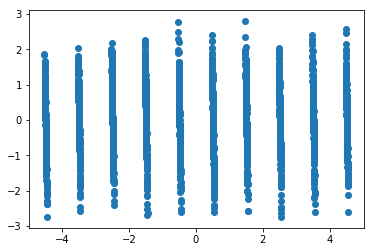

In [6]:
# dimensionality reduction
pca = PCA(n_components=2)

# Fit the data
pca.fit(data_filled.iloc[:,4:])
transformed = pca.transform(data_filled.iloc[:,4:])
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys)
plt.show()

## Manual Calculation of PCA and eigenvalues
For completeness the eigenvalues and eigenvectors were computed using only numpy  
We can see that the values closely resemble sklearn's returned results. Sklearn uses SVD in the background to compute the PCA

In [7]:
X = data_filled.iloc[:,4:]
n_samples = X.shape[0]
# We center the data and compute the sample covariance matrix.
X -= np.mean(X, axis=0)
cov_matrix = np.dot(X.T, X) / n_samples

eigenValues, eigenVectors = LA.eig(cov_matrix)

idx = eigenValues.argsort()[::-1]   
eigenValues = pd.Series(eigenValues[idx])
eigenVectors = pd.DataFrame(eigenVectors[:,idx])
display(eigenValues[:20])

0     8.257252
1     1.089292
2     0.760463
3     0.333794
4     0.287296
5     0.186863
6     0.161842
7     0.133304
8     0.111813
9     0.088749
10    0.076694
11    0.057290
12    0.055685
13    0.053817
14    0.048017
15    0.045081
16    0.039346
17    0.033275
18    0.029939
19    0.028335
dtype: float64